<a href="https://colab.research.google.com/github/jyoshnakonidala11/SOURCE-CODE-DATA-SET-3-/blob/main/Iron_alloys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import numpy as np
import re

df = pd.read_csv('/content/iron_alloys.csv')

target_column = "Tensile Strength: Ultimate (UTS) (psi)"

df = df.dropna(subset=[target_column])
def clean_density(density_str):
    if pd.isna(density_str):
        return None
    density_str = str(density_str).replace(',', '.')
    numeric_chars = re.findall(r'\d+\.?\d*', density_str)
    if numeric_chars:
        return float(numeric_chars[0])
    return None

if 'Density (psi)' in df.columns:
    df['Density (psi)'] = df['Density (psi)'].apply(clean_density)

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
if target_column in numeric_cols:
    numeric_cols.remove(target_column)
if 'iron_alloy_name' in numeric_cols:
    numeric_cols.remove('iron_alloy_name')

X = df[numeric_cols]
y = df[target_column]


mechanical_cols = ["Elastic (Young's, Tensile) Modulus (psi)",
                   "Elongation at Break (%)",
                   "Shear Modulus (psi)"]
if 'Density (psi)' in X.columns:
  mechanical_cols.append("Density (psi)")
else:

    if 'Density (psi)' in mechanical_cols:
        mechanical_cols.remove("Density (psi)")


composition_cols = X.columns.difference(mechanical_cols)

mechanical_pipeline = Pipeline([
    ('imputer_nan', SimpleImputer(strategy='median')),
    ('imputer_inf', SimpleImputer(missing_values=np.inf, strategy='median')),
    ('scaler', StandardScaler())
])
composition_pipeline = Pipeline([
    ('imputer_nan', SimpleImputer(strategy='median')),
    ('imputer_inf', SimpleImputer(missing_values=np.inf, strategy='median')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer([
    ('mech', mechanical_pipeline, mechanical_cols),
    ('comp', composition_pipeline, composition_cols)
])

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR()
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = None
best_r2 = -float('inf')
results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    if r2 > best_r2:
        best_r2 = r2
        best_model = pipeline

for model_name, metrics in results.items():
    print(f"{model_name}: MSE={metrics['MSE']:.2f}, R2={metrics['R2']:.2f}")

print("\nBest model:", best_model.named_steps['regressor'])

joblib.dump(best_model, "best_alloy_model.pkl")
print("Best model saved as 'best_alloy_model.pkl'")

Linear Regression: MSE=119.38, R2=1.00
Random Forest: MSE=181.00, R2=1.00
Gradient Boosting: MSE=99.55, R2=1.00
Support Vector Machine: MSE=40728.40, R2=0.16

Best model: GradientBoostingRegressor(random_state=42)
Best model saved as 'best_alloy_model.pkl'



Comparison Table:
                    Model           MSE        R2
0       Linear Regression    119.382484  0.997534
1           Random Forest    180.999029  0.996261
2       Gradient Boosting     99.548395  0.997944
3  Support Vector Machine  40728.395184  0.158708


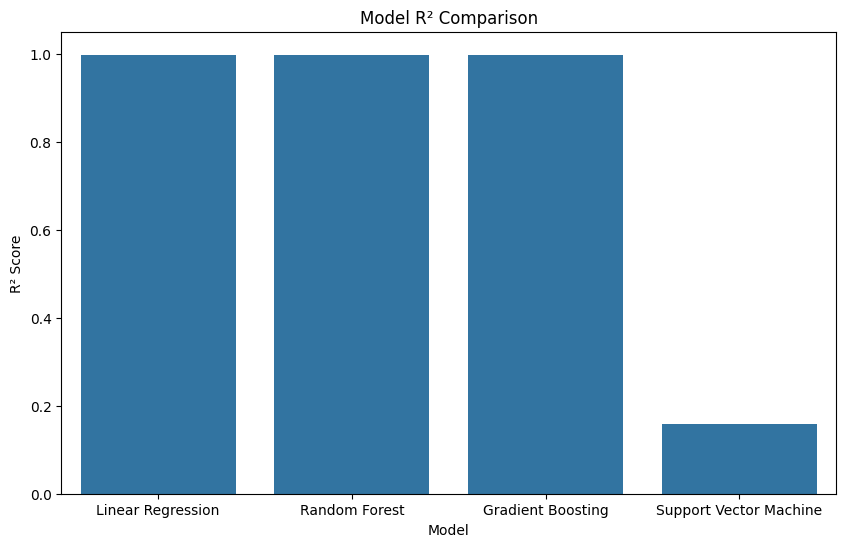


Best model: GradientBoostingRegressor(random_state=42)
Best model saved as 'best_alloy_model.pkl'


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/iron_alloys.csv')

target_column = "Tensile Strength: Ultimate (UTS) (psi)"
df = df.dropna(subset=[target_column])

def clean_density(density_str):
    if pd.isna(density_str):
        return None
    density_str = str(density_str).replace(',', '.')
    numeric_chars = re.findall(r'\d+\.?\d*', density_str)
    if numeric_chars:
        return float(numeric_chars[0])
    return None

if 'Density (psi)' in df.columns:
    df['Density (psi)'] = df['Density (psi)'].apply(clean_density)

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in [target_column, 'iron_alloy_name']:
    if col in numeric_cols:
        numeric_cols.remove(col)

X = df[numeric_cols]
y = df[target_column]

mechanical_cols = ["Elastic (Young's, Tensile) Modulus (psi)", "Elongation at Break (%)", "Shear Modulus (psi)"]
if 'Density (psi)' in X.columns:
    mechanical_cols.append("Density (psi)")
composition_cols = X.columns.difference(mechanical_cols)

mechanical_pipeline = Pipeline([
    ('imputer_nan', SimpleImputer(strategy='median')),
    ('imputer_inf', SimpleImputer(missing_values=np.inf, strategy='median')),
    ('scaler', StandardScaler())
])
composition_pipeline = Pipeline([
    ('imputer_nan', SimpleImputer(strategy='median')),
    ('imputer_inf', SimpleImputer(missing_values=np.inf, strategy='median')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer([
    ('mech', mechanical_pipeline, mechanical_cols),
    ('comp', composition_pipeline, composition_cols)
])

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR()
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = None
best_r2 = -float('inf')
results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    if r2 > best_r2:
        best_r2 = r2
        best_model = pipeline

results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})
print("\nComparison Table:")
print(results_df)

plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='R2', data=results_df)
plt.title("Model R² Comparison")
plt.ylabel("R² Score")
plt.ylim(0,1.05)
plt.show()

joblib.dump(best_model, "best_alloy_model.pkl")
print("\nBest model:", best_model.named_steps['regressor'])
print("Best model saved as 'best_alloy_model.pkl'")